# <center> Python - Exploratory Data Analysis on Spotify 2023 Dataset</center>


# Preparation

In [3]:
#the most important step is to call thee libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#to determine the encoding type of the file this code was used (because I encountered an error when I first tried to read the file)

#using the chardet library (aka the universal character encoding detector)
import chardet

with open('spotify-2023.csv', 'rb') as f:

    whichType = chardet.detect(f.read())

#show which type is the data set
whichType


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [5]:
#finally, open the file 
rawData = pd.read_csv('spotify-2023.csv', encoding = 'ISO-8859-1')

#output the date set
rawData

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Overview of Dataset

## How many rows and columns does the dataset contain?

In [11]:
#we can utilize two functions to get an immediate overview .info() and .describe()

#utilizing .info()
rawData.info() #we can gather the number of rows (number of entries), the number of columns (Data columns), collective non-null count, 
               #collective data type, and for missing entries (non-null count - entries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## What are the data types of each column? Are there any missing values?

In [14]:
#to check directly the null elements and the number of rows and columns

#we can use the output of the .shape function for the number of columns and rows
columns, rows = rawData.shape
print('Columns: ', columns)
print('Rows: ', rows)

#we can immediately check if the data in the table is a null number
rawData.isnull().sum() #.sum() is used to sum up the number of null numbers in one number

Columns:  953
Rows:  24


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [16]:
#to streamline and visualize the basic overview

#we can make a basic overview summary
basicOverviewSummary = pd.DataFrame({
    'Total Entries': len(rawData),  
    'Non-Null Count': rawData.count(),  
    'Data Type': rawData.dtypes,  
    'Missing Values': rawData.isnull().sum() })

#output the summary
basicOverviewSummary

,Total Entries,Non-Null Count,Data Type,Missing Values
track_name,953,953,object,0
artist(s)_name,953,953,object,0
artist_count,953,953,int64,0
released_year,953,953,int64,0
released_month,953,953,int64,0
released_day,953,953,int64,0
in_spotify_playlists,953,953,int64,0
in_spotify_charts,953,953,int64,0
streams,953,953,object,0
in_apple_playlists,953,953,int64,0


# Basic Descriptive Statistics

## Basic Overview

In [20]:
#we can utilize a function to get basic descriptive statistics about the rawData using the .describe() function

#using the .describe() function, we can gather count, mean, std, min, 25%, 50%, 75%, 100%, and max
rawData.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [22]:
#then I wondered why the columns were missing some attributes, and then I learned that they were not included because they havd a different data type.

#To also show the other attributes, we can include a parameter in the .describe() which is include=['O'], this works because 'O' corresponds to object

#with the new parameter, we can gather the count, unique, top, and freq of the object
rawData.describe(include = ['O']).T #the .t is to transpose the dataframe so that it matches with the output above

,count,unique,top,freq
track_name,953,943,Daylight,2
artist(s)_name,953,645,Taylor Swift,34
streams,953,949,723894473,2
in_deezer_playlists,953,348,0,24
in_shazam_charts,903,198,0,344
key,858,11,C#,120
mode,953,2,Major,550


## What are the mean, median, and standard deviation of the streams column?

In [25]:
#this question is quite odd. When looking into the .csv file itself, the stream's columns are full of numbers, yet its data type is an object, as seen 
#in the basic overview. This happened because although they are numbers, their format is not in int or float

#to gather the mean, median, and standard deviation of the stream attribute

#we first must transform the entires to numeric values
rawData['streams'] = pd.to_numeric(rawData['streams'], errors = 'coerce') #as I learned the hard way, the errors='coerce' is really important as
                                                                          #simply running the .to_numeric() function, it will complete the job, yet
                                                                          #once computing for the required it will give an error. This parameter  
                                                                          #changes the values it cannot transform to a NaN value. This is crucial 
                                                                          #to not cause errors when computing the row or column

#to visualize and streamline, we can put the computed values in a dataframe
streamStats = {
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],
    'Value': [
        rawData['streams'].mean(),
        rawData['streams'].median(),
        rawData['streams'].std() ]}

#turn the variable into a dataFrame
summartOfStreamStats = pd.DataFrame(streamStats) 

#output the summary of the statistics of the stream attribute
summartOfStreamStats

,Statistic,Value
0,Mean,5.141374e+08
1,Median,2.905309e+08
2,Standard Deviation,5.668569e+08


## What is the distribution of released_year and artist_count?

In [28]:
#for context, we can lay out the actual numbers before visualizing 

#using a data frame to gather the number of songs per release year (nospry)

#first, it counts the individual times each year appears in the released_year column
nospryData = rawData['released_year'].value_counts().sort_index() #it sorts the data by its index, which is the year
nospry = nospryData.reset_index() #we reset the index so that the year can be a column itself
nospry.columns = ['Year', 'Number of Releases'] #the .column is used to specify we are renaming the column names 

#output the number of songs per release year
nospry

,Year,Number of Releases
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1952,1
5,1957,2
6,1958,3
7,1959,2
8,1963,3
9,1968,1


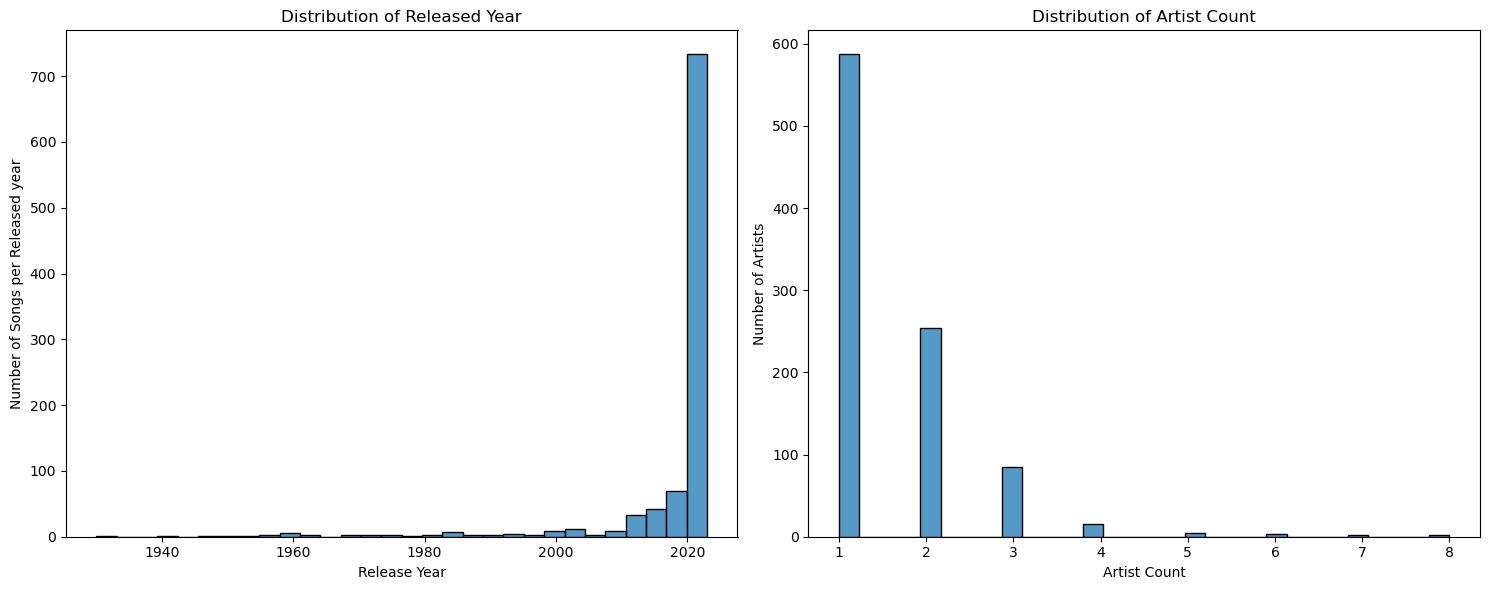

In [30]:
#to visualize the distribution of release year and artist count

#we can utilize a histogram to see the number of songs released per year and the number of artists per year

#the histograms

#establish the figsize
plt.figure(figsize = (15, 6))

#to visualize further, we can put the two histograms side-by-side using a subplot

#subplot 1
plt.subplot(1, 2, 1) 

#the histogram 1 itself
sns.histplot(rawData['released_year'], bins = 30) 

#labels
plt.title('Distribution of Released Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs per Released year')

#subplot 2
plt.subplot(1, 2, 2)  

#the histogram 2
sns.histplot(rawData['artist_count'], bins = 30)

#labels
plt.title('Distribution of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Number of Artists')

#design :)
plt.tight_layout()

#output the histograms
plt.show()

## Are there any noticeable trends or outliers?

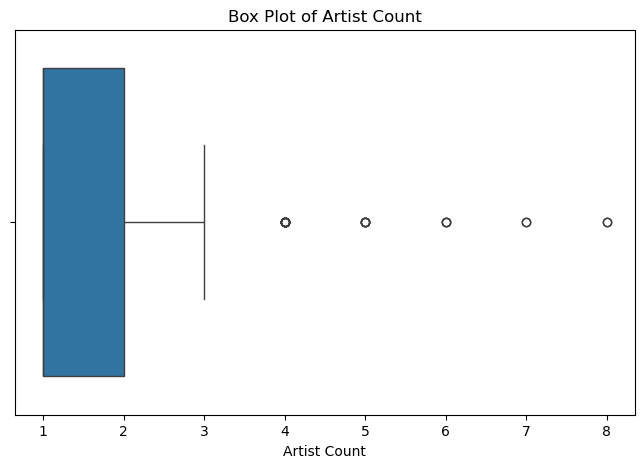

In [32]:
#to check for outliers, we can utilize two ways
#one is to create a box plot of the data set to visualize the outliers

#the box plot

#establish figsize
plt.figure(figsize = (8, 5))

#the box plot itself
sns.boxplot(x = rawData['artist_count'])

#labels
plt.title('Box Plot of Artist Count')
plt.xlabel('Artist Count')

#output the box plot
plt.show()

In [34]:
#another way to see outliers is the numerical way
#we can calculate the z-score of the artist_cout and then determine if the value is below or above the threshold 

#the formula for z-score (X - μ / σ)

#create a new column called artistCountZscore, then compute and store the value of the z score there
rawData['artistCountZscore'] = (rawData['artist_count'] - rawData['artist_count'].mean()) / rawData['artist_count'].std()

#obtain the z scores that are way above or way below the normal threshold, which may indicate that it is an outlier
outliersData = rawData[(rawData['artistCountZscore'] > 2) | (rawData['artistCountZscore'] < -2)]

#create a dataframe consisting of artist_count and artist count z score
outliers = outliersData[['artist_count', 'artistCountZscore']]

#sort the dataframe from biggest to smallest
theOutliers = outliers.sort_values(by = 'artist_count', ascending = False).reset_index(drop = True) #reset index so that it is from 1 - n instead of 
                                                                                                    #placing its original index

#output the outliers
theOutliers

,artist_count,artistCountZscore
0,8,7.215613
1,8,7.215613
2,7,6.095848
3,7,6.095848
4,6,4.976082
5,6,4.976082
6,6,4.976082
7,5,3.856317
8,5,3.856317
9,5,3.856317


## Analysis


Data shows that most Spotify listeners listen to songs released from the previous year. Usually, listeners listen to music released in the current year or released near the current year. As we move away from the 2020s, the number of songs people listen to from that year decreases. There are multiple theories as to why listeners still hear from tracks from 2022. One reason is that the tracks from 2023 simply didn't blow up or trend like the previous year. In a landscape dominated by trends, releasing a song will likely begin the new “craze” in social media, creating demand for the song. Another reason is that only a few artists are currently in their “era.” for example, multiple Taylor Swift songs and the weekend are trending while they were released previously.

Regarding the artist count, the landscape is diverse as many artists or most artists have only a single or dual release. So, there is a large selection of diverse artists all over the globe. Only a few could transcend and create a so-called era for themselves. A prime example is Taylor Swift; even in 2024, her craze still stands strong.


## Insights

-The landscape is diverse, with many different artists <br>
-Only a few artists have been able to climb to the very top

# Top Performers

## Which track has the highest number of streams? Display the top 5 most streamed tracks.

In [43]:
#To gather the top five most streamed tracks 

#we can sort the data by streams and then output the top 5
mostStreamedTracks = rawData.sort_values(by = 'streams', ascending = False).head(5) #the .sort_values to sort the values than the parameters is 
                                                                                    #by streams  and is in descending order
                                                                                    #the .head(5) is to to gather the top 5 entries from the data set

#create a dataframe with tranck_name and streams
mostStreamedTracks[['track_name', 'streams']].reset_index(drop = True) #reset the index to have a sorted index, drop = True to remove the original index


,track_name,streams
0,Blinding Lights,3.703895e+09
1,Shape of You,3.562544e+09
2,Someone You Loved,2.887242e+09
3,Dance Monkey,2.864792e+09
4,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


## Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [46]:
#to obtain the artist with the most releases

#we first gather the data by locating the number of times a unique value (the name) appears in the data set
artistTrackCountData = rawData['artist(s)_name'].value_counts().head(5)

#reset the index so that the artist name will be a column itself
artistTrackCount = artistTrackCountData.reset_index()

#rename the column names for clarity
artistTrackCount.columns = ['Artist Name', 'Artist Count']

#output the artist with the most releases
artistTrackCount

,Artist Name,Artist Count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


# Temporal

## Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

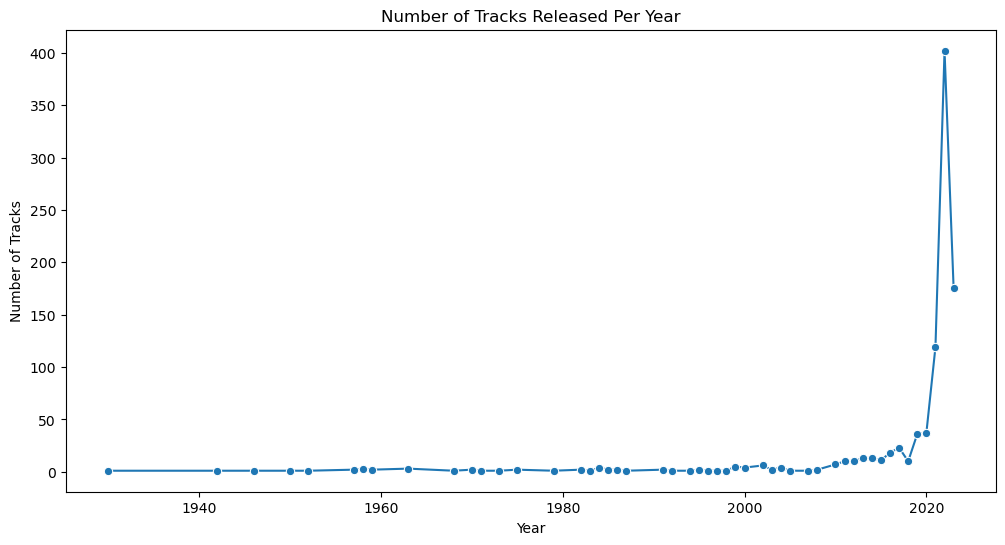

In [50]:
#to analyze the tracks released overtime we graph the data set into a line graph

# line graph

#gather the data by selecting how many times it is repeated in the data set
tracksPerYear = rawData['released_year'].value_counts().sort_index()

#establish figsize
plt.figure(figsize = (12, 6))

#the line plot itself
sns.lineplot(x = tracksPerYear.index, y = tracksPerYear.values, marker = 'o')

#labels
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')

#show to released tracks per year
plt.show()

## Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

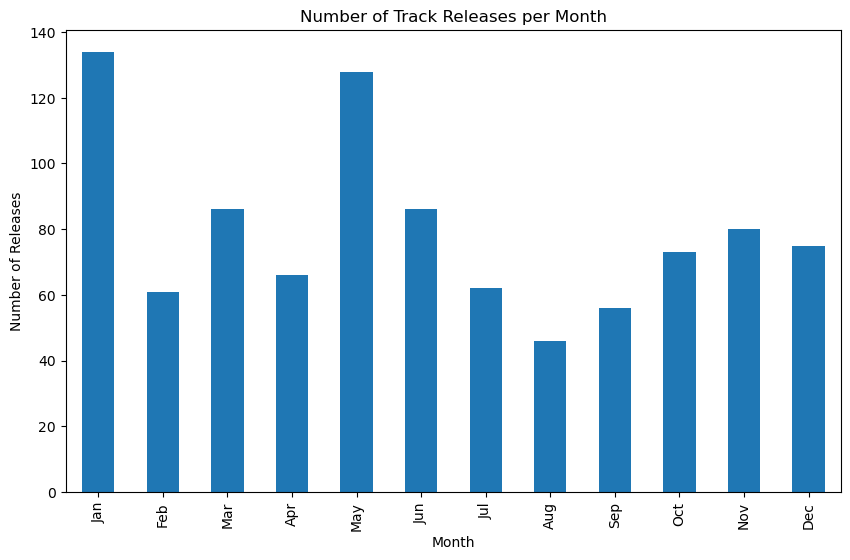

In [53]:
#to analyze the number of track releases per month, we can plot a bar graph 

#gather the monthly release data
monthlyReleases = rawData['released_month'].value_counts().sort_index()

#specify the kind of graph and the fig size
monthlyReleases.plot(kind ='bar', figsize = (10, 6))

#labels
plt.title('Number of Track Releases per Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(ticks = range(12), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#output the number of track releases per month
plt.show()

## Analysis

Like above, most songs being listened to were released during 2022, 2023, and 2021 are close, but the majority are from the previous year. As we move away from the 2020s, we can also see that the viewer is the song being listened to.

Regarding the monthly trend in songs, artists tend to release songs during January and May. For artists releasing in January, this may be because they are trying to start the tone for the coming year. They also might pick interests while most people are on vacation because of the New Year celebration. For artists releasing in May, this may be attributed to them trying not to be overcrowded during the summer months release. Either they are trying to get ahead or stand out from the influx of songs in June.


## Insight

-Artists tend to release during January to set a tone <br>
-Artists tend to release during May to get ahead of the coming summer season <br>
-Most songs that are being streamed are from 2022

# Genre and Music Characteristics

## Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

In [61]:
#to see how the different attributes correlate with streams, we can utilize heat to see their correlation
#but first, we can visualize it numerically. We can directly gather the pairwise correlation of the attributes and streams we computed

#correlation (corr) 

#store the different columns of the attributes in one variable
corrWithAttributeRawData = rawData[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 
                              'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

#compute the correlation using .corr
corrWithAttributeData = corrWithAttributeRawData.corr()

#reset the index so that the attribute becomes a column itself
corrWithAttribute = corrWithAttributeData[['streams']].reset_index()

#rename the column name for clarity
corrWithAttribute.columns = ['Attribute', 'Correlation with Streams']

#output the correlation of the attributes to the stream
corrWithAttribute

,Attribute,Correlation with Streams
0,streams,1.000000
1,bpm,-0.002438
2,danceability_%,-0.105457
3,energy_%,-0.026051
4,valence_%,-0.040831
5,acousticness_%,-0.004485
6,instrumentalness_%,-0.044902
7,liveness_%,-0.048337
8,speechiness_%,-0.112333


## Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

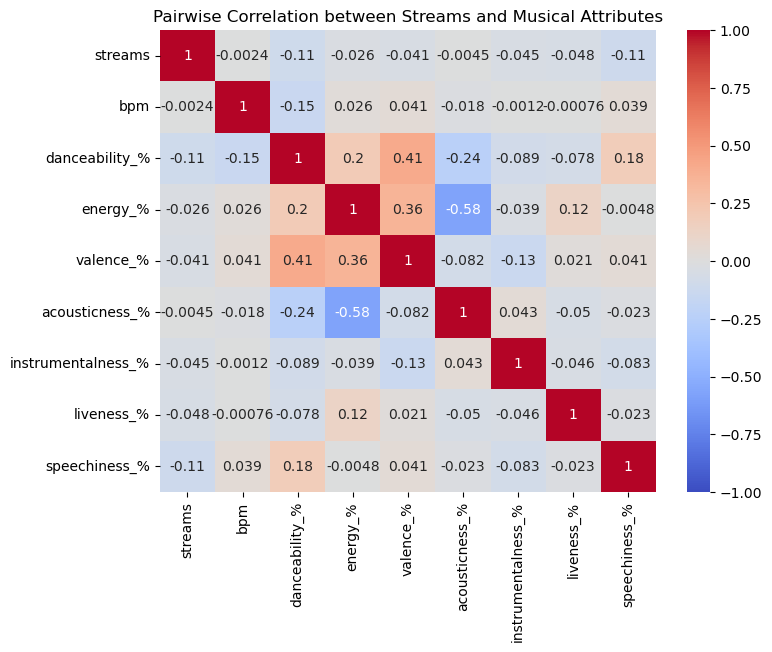

In [64]:
#After seeing it numerically, we can visualize it using a heat map

#heat map

#establish figsize
plt.figure(figsize=(8, 6))

#the heatmap itself
sns.heatmap(corrWithAttributeData, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)

#labels
plt.title('Pairwise Correlation between Streams and Musical Attributes')

#show the pairwise correlation between streams and musical attributes
plt.show()

## Analysis

For the most part, the numbers of streams and music attributes have a low to no correlation. As seen in the heat map, they are near zero, which makes them a nonfactor.

Also, when it comes to evaluating pairwise correlation between attributes, they do not seem to have a strong correlation.  Some may increase to a rating of 0.5 to -0.51. Notable relations are between energy and acoustics,  valance and danceability, valance, and energy. The first in the list has a negative correlation, meaning as one increases, the other decreases, while the two latter are positive, which means as one increases, the other increases.


## Insight

-little to no correlation between number of stremas and musical attributes <br>
-The same with the muscial attributes themselves but their is a few notable relations <br>
    -energy and acoustics, having a mild inverse relationship <br>
    -valance and danceability, having a mild proportinal relationship <br>
    -valance, and energy, having a mild proportinal relationship <br>

#  Platform Popularity

## Cleaning Like a Data Engineer

In [72]:
# While trying to create a heat map for the next part, I encountered specific problems. Some of the values have commas (,)
#so the first step is to replace those commas with spaces so that they can be transformed into a numeric value

#replace the commas with spaces
rawData['in_deezer_playlists'] = rawData['in_deezer_playlists'].replace(',', '') 
rawData['in_shazam_charts'] = rawData['in_shazam_charts'].replace(',', '')

#then transform all to numeric values to be used in calculations
rawData['in_spotify_playlists'] = pd.to_numeric(rawData['in_spotify_playlists'], errors='coerce')
rawData['in_spotify_charts'] = pd.to_numeric(rawData['in_spotify_charts'], errors='coerce')
rawData['in_apple_playlists'] = pd.to_numeric(rawData['in_apple_playlists'], errors='coerce')
rawData['in_apple_charts'] = pd.to_numeric(rawData['in_apple_charts'], errors='coerce')
rawData['in_deezer_playlists'] = pd.to_numeric(rawData['in_deezer_playlists'], errors='coerce')
rawData['in_deezer_charts'] = pd.to_numeric(rawData['in_deezer_charts'], errors='coerce')
rawData['in_shazam_charts'] = pd.to_numeric(rawData['in_shazam_charts'], errors='coerce')

## How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare?

In [75]:
#to gather the correlation between the number of streams and the different platforms, we can also utilize the pairwise correlation  
#between the number of streams and the different platforms and transform them into a heat map
#but first, we can visualize it numerically. We can directly gather the pairwise correlation of the platforms and streams

#store the different columns of the attributes in one variable
corrWithPlatformRawData = rawData[['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
                                   'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']]

#compute the pairwise correlation between the different platforms and  the number of streams streams
corrWithPlatformData = corrWithPlatformRawData.corr()

#gather the correlation with 'streams' specifically, then reset the index
corrWithPlatform = corrWithPlatformData[['streams']].reset_index()

#rename the columns for claity
corrWithPlatform.columns = ['Platform', 'Correlation with Streams']

# Output the correlation of the different platforms and  the number of streams streams
corrWithPlatform

,Platform,Correlation with Streams
0,streams,1.000000
1,in_spotify_playlists,0.789822
2,in_spotify_charts,0.245821
3,in_apple_playlists,0.772063
4,in_apple_charts,0.320234
5,in_deezer_playlists,0.746022
6,in_deezer_charts,0.228598
7,in_shazam_charts,0.056881


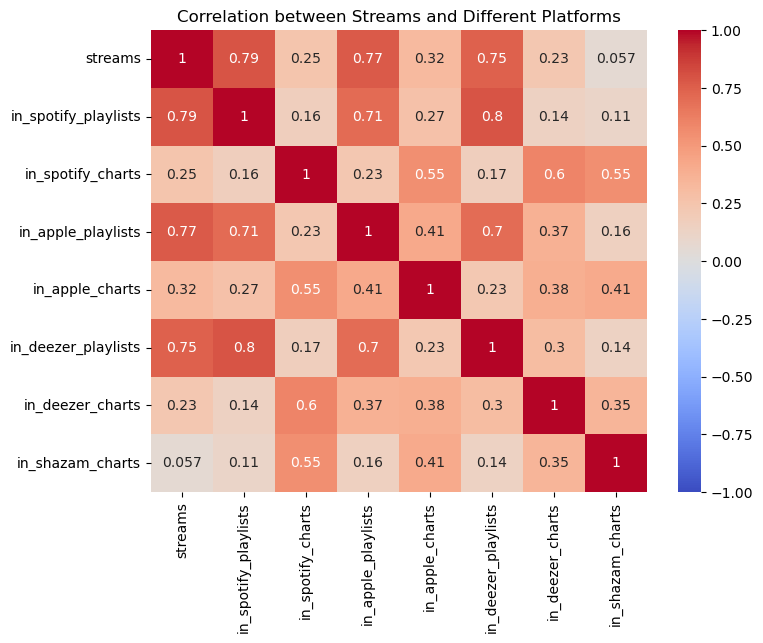

In [77]:
#After seeing it numerically we can visualize it using a heat map

#heat map

#establish figsize
plt.figure(figsize=(8, 6))

#the heatmap itself
sns.heatmap(corrWithPlatformData, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)

#labels
plt.title('Correlation between Streams and Different Platforms')

#Output the different platforms and  the number of streams streams
plt.show()



## Which platform seems to favor the most popular tracks?

In [79]:
#to gather the correlation between top tracks and the different streaming platforms, we can simply re-run the correlation of streams with
#different platforms but add an extra parameter. That parameter limits the streams to the top 100 most streamed tracks.

#the new parameter
numOfTopSong = 100

#gather the 100 most streamed tracks
highestStream = rawData.nlargest(numOfTopSong, 'streams')

#store the different columns of the platforms to one variable but with a filter of the top 100
corrWithHighestStreamsRawData = highestStream[['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
                                        'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']]

#compute the pairwise correlation of the top 100 most streamed tracks and the different platforms
corrWithHighestStreamsData = corrWithHighestStreamsRawData.corr()

#gather the correlation directly relating to 'streams'
corrWithHighestStreams = corrWithHighestStreamsData[['streams']].reset_index()

#rename the columns for clarity
corrWithHighestStreams.columns = ['Platform', 'Correlation with Streams (Top 100)']

#output the correlation of the top 100 most streamed tracks and the different platforms
corrWithHighestStreams

,Platform,Correlation with Streams (Top 100)
0,streams,1.000000
1,in_spotify_playlists,0.348078
2,in_spotify_charts,0.160813
3,in_apple_playlists,0.542509
4,in_apple_charts,0.280244
5,in_deezer_playlists,0.223574
6,in_deezer_charts,0.070239
7,in_shazam_charts,-0.170306


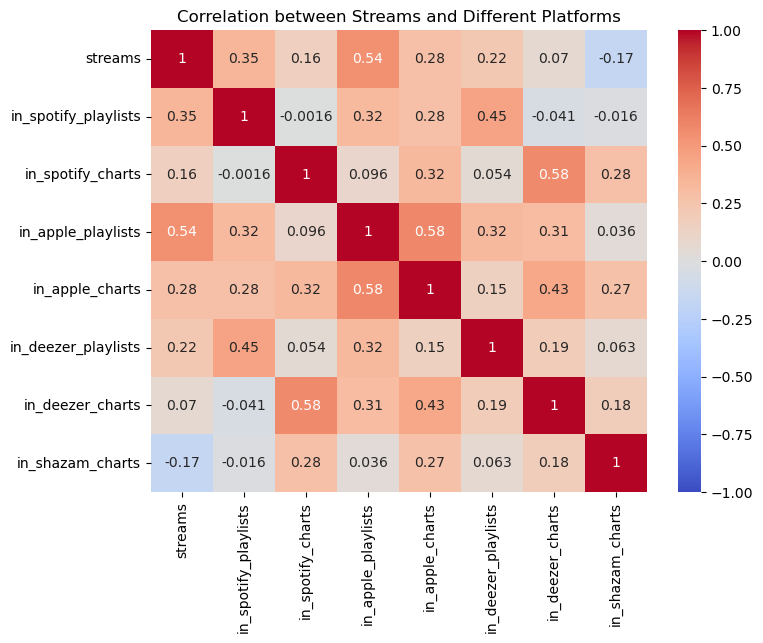

In [81]:
#After seeing it numerically, we can visualize it using a heat map

#heat map

#establish figsize
plt.figure(figsize=(8, 6))

#heatmap itself
sns.heatmap(corrWithHighestStreamsData, annot = True, cmap = 'coolwarm', vmin =- 1, vmax = 1)

#labels
plt.title('Correlation between Streams and Different Platforms')

#Output the correlation of the top 100 most streamed tracks and the different platforms
plt.show()

## Analysis

From the first heat map, the platforms that are favored are Spotify playlist, Apple Playlist, and Deezer playlist. They seem to be favored compared to the rest, having a correlation value below 0.3.

When it comes to the top tracks, very little correlation seems to be found between platforms. A notable note is Apple playlists having a mild  0.5 correlation score, which is the highest 

## Insight

-When it comes to platforms spotify playlists, apple playlist, deezer playlists	are favored in total streams <br>
-When it comes to the top 100, apples are favored compared to the rest, yet these correlations are mild at best.

# Advanced Analysis

## Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

In [90]:
#to gather statistics of the mode vs key, first, we must gather their numerical statistics

#gather the number of times the specific keys and modes are repeated
numOfKeyAndModeData = rawData[['key', 'mode']].value_counts().reset_index(name='track_count')

#rename the columns for clarity
numOfKeyAndModeData.columns = ['key', 'mode', 'track_count']

#sort the values by key to be alphabetical and in descending order
numOfKeyAndMode = numOfKeyAndModeData.sort_values(by='key', ascending=True).reset_index(drop=True)

#output the number of tracks that are in their respective keys and modes
numOfKeyAndMode 

,key,mode,track_count
0,A,Major,42
1,A,Minor,33
2,A#,Major,27
3,A#,Minor,30
4,B,Major,35
5,B,Minor,46
6,C#,Major,73
7,C#,Minor,47
8,D,Minor,15
9,D,Major,66


In [92]:
#now calculate just the two types of mode, major and minor

#calculate how many modes are similar in the track_count column
majorTracks = numOfKeyAndModeData[numOfKeyAndModeData['mode'] == 'Major']['track_count'].sum()
minorTracks = numOfKeyAndModeData[numOfKeyAndModeData['mode'] == 'Minor']['track_count'].sum()

#turn the mode type and number of times into a dataframe
modesTotal = pd.DataFrame({
    'mode': ['Major', 'Minor'],
    'track_count': [majorTracks, minorTracks]})

#output how many are in total are major or minor mode
modesTotal

,mode,track_count
0,Major,475
1,Minor,383


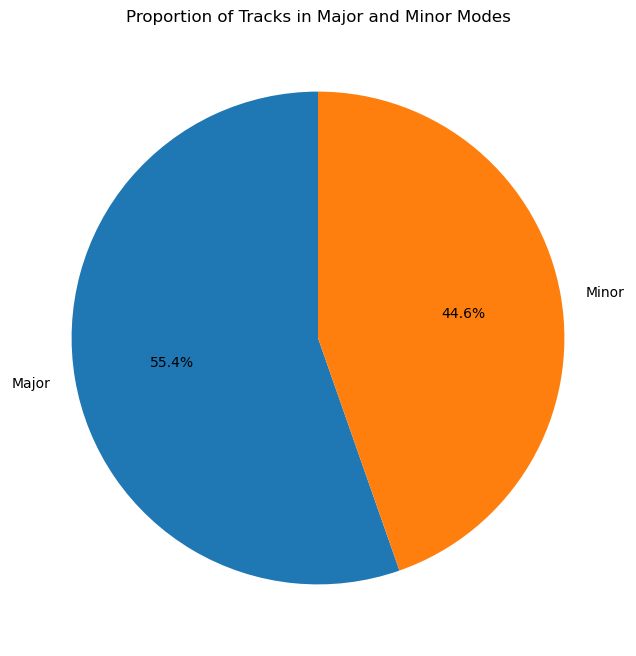

In [94]:
#to visualize the proportion of minor vs major we can plot it in a pie chart

#establish figuire size
plt.figure(figsize=(8, 8))  

#the pie chart itself
plt.pie(modesTotal['track_count'], labels = modesTotal['mode'], autopct = '%1.1f%%', startangle = 90)

#label
plt.title('Proportion of Tracks in Major and Minor Modes')

# Display Proportion of Tracks in Major and Minor Modes
plt.show()

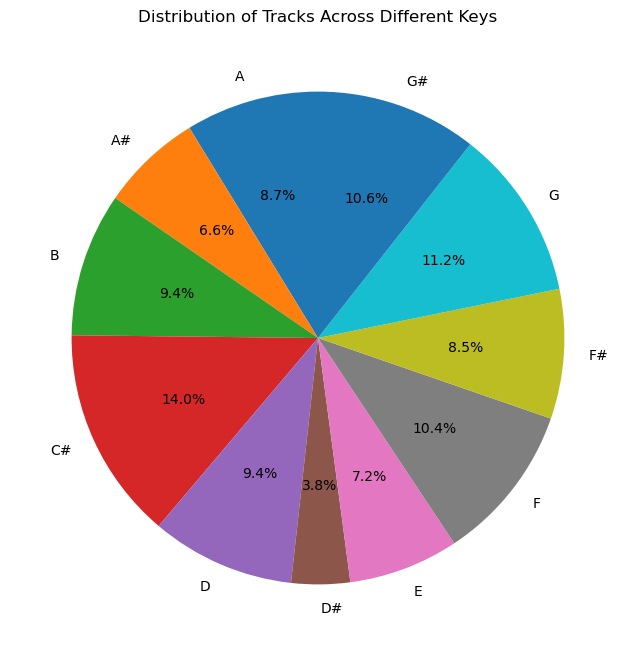

In [96]:
#to visualize in terms of the different keys, we can use the key values instead of the mode

#gather how many times each key is repeated
numOfKeysData = rawData['key'].value_counts()

#sort the index alphabetically for clarity
numOfKeys = numOfKeysData .sort_index()

#establish fig size
plt.figure(figsize=(8, 8))  

#the pie chart itself
plt.pie(numOfKeys, labels = numOfKeys.index, autopct = '%1.1f%%', startangle = 90)
 
#label
plt.title('Distribution of Tracks Across Different Keys')

#output Distribution of Tracks Across Different Keys
plt.show()

## Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

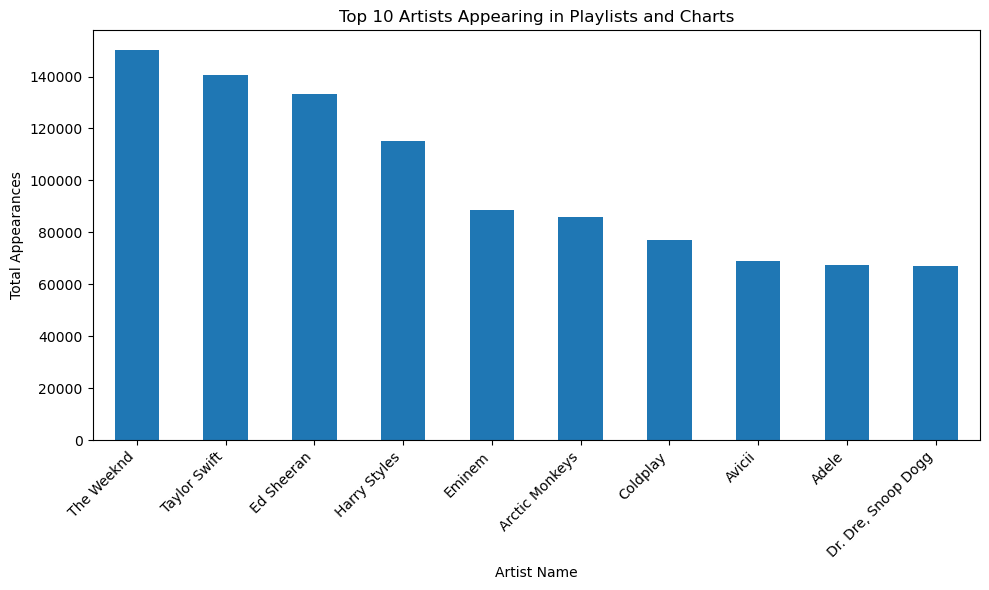

In [99]:
#to be honest, this part is tricky because I couldn't understand the .groupby function. For the first time, I tried to use a for loop
#to gather the artistStats, but it just wasn't working, so when I searched for ways to fix the code, I came across the .groupby function
#it uses advanced algorithms such as SQL, which I do not know, but it gets the job done of locating the specific artists 
#my apologies for being chicken

#to gather the top artists appearing in the playlist and charts


#first, we bundle categories going to be used
diffPlatforms = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
                 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

#create a new category with the total appearance of the artists
rawData['totalAppearances'] = rawData[diffPlatforms].sum(axis=1)

#create a dataframe with the artist's name and their total appearances
artistStats = rawData[['artist(s)_name', 'totalAppearances']]

#this is a special function that I do not fully grasp, but it utilizes SQL to find relevant data required
artistStats  = artistStats.groupby('artist(s)_name')['totalAppearances'].sum()

#limit to the top 10 artist
topArtists = artistStats.sort_values(ascending = False).head(10)

#to visualize we can plot it using a bar graph

#the bar graph

#establish the figsize
plt.figure(figsize=(10, 6))

#the bar plot itself
topArtists.plot(kind='bar')

#labels
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Artists Appearing in Playlists and Charts')
plt.xlabel('Artist Name')
plt.ylabel('Total Appearances')

#design
plt.tight_layout()

#output the Top 10 Artists Appearing in Playlists and Charts'
plt.show()

## Analysis

When it comes to minor and major in the totality, they have a pretty 50/50 split, with major winning by a few percent points. In specific modes and keys, C# minor, major, D# major, and minor have the highest numbers. For the most part, when it comes to keys, it is pretty random. A notable insight is that D# has the lowest amount of values

When it comes to Artists that keep re-appearing, artists that are in the top 1- are artists the have more than three releases, meaning the more songs they have may indicate that they are more present in playlists and charts since they are not singles or dual release artists. 


## Insight

-Major and minor modes have an almost identical split minor having a few more percentages <br?
-when it comes to keys it is pretty random C# and D # have majorty of the counts whole D# have the lowest <br?
-Artist with more release show up more in playlist and charts


# Thee end